**MACHINE LEARNING**

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from AutoLogging_ML import AutoLogger

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

**UPLOAD DATASET**

In [2]:
df = pd.read_csv("../../dataset/hearts_stats.csv") # Import dataset
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


**DATA CLEARING**

In [5]:
print(f"Null values: {df.isnull().sum()}\n\n") # Check null values
print(f"Na values: {df.isna().sum()}\n\n") # Check na values
print(f"Duplicates: {df.duplicated().sum()}") # Check duplicated

Null values: age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Na values: age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


Duplicates: 272


In [6]:
df = df.drop_duplicates() # Drop duplicates

In [7]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest pain type      918 non-null    int64  
 3   resting bp s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting blood sugar  918 non-null    int64  
 6   resting ecg          918 non-null    int64  
 7   max heart rate       918 non-null    int64  
 8   exercise angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  ST slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [9]:
print(f"Duplicates: {df.duplicated().sum()}") # Check duplicated

Duplicates: 0


**SPLIT INTO LABELS AND TARGETS**

In [10]:
X = df.drop("target",axis=1)
y = df["target"]

**MAKE TRAIN AND TEST DATA**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=911)

**ADD SCALER FOR UPGRADE MODEL**

In [12]:
scaler = StandardScaler()

In [13]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**FAST TESTING FUCNTION**

In [14]:
# For test model
def prediction_evaluate(model,name):
    pred = model.predict(scaled_X_test)
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(name)
    plt.show()
    
    print(classification_report(y_test, pred))
    print("\n\n\n\n\n")

In [15]:
# list model for train
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier":RandomForestClassifier(n_estimators=1000),
    "XGBRegression":XGBRegressor(n_estimators=10),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

**FAST CHECK THE BEST MODELS**

In [16]:
for name, model in models.items():
    model.fit(scaled_X_train, y_train)
    score = model.score(scaled_X_test, y_test)
    print(f"{name} Accuracy: {score * 100:.2f}%")

Logistic Regression Accuracy: 88.04%
Decision Tree Accuracy: 77.72%
Support Vector Classifier Accuracy: 90.22%
Random Forest Classifier Accuracy: 90.76%
XGBRegression Accuracy: 62.12%
Gradient Boosting Classifier Accuracy: 89.67%
K-Nearest Neighbors Accuracy: 88.59%


**CREATE ADABOOSTER**

In [17]:
# Adaboost

param = {
    "estimator__criterion": ["gini", "entropy", "log_loss"],
    "learning_rate": np.arange(0.1, 1.1, 0.1),
    "estimator__n_estimators": [1000],  # Wrap single value in a list
    "estimator__max_depth": [10000]  # Wrap single value in a list
}

rfc = RandomForestClassifier()
ada = AdaBoostClassifier(estimator=rfc)

ada_grid = GridSearchCV(estimator=ada, param_grid=param, cv=2, scoring="accuracy")

**TRAIN ADABOOSTER**

In [18]:
ada_grid.fit(scaled_X_train,y_train)

C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this wa

GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(estimator=RandomForestClassifier()),
             param_grid={'estimator__criterion': ['gini', 'entropy',
                                                  'log_loss'],
                         'estimator__max_depth': [10000],
                         'estimator__n_estimators': [1000],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='accuracy')

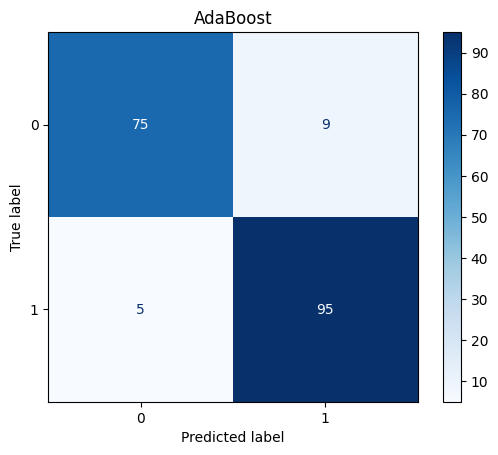

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        84
           1       0.91      0.95      0.93       100

    accuracy                           0.92       184
   macro avg       0.93      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184









AdaBoostClassifier(estimator=RandomForestClassifier(criterion='log_loss',
                                                    max_depth=10000,
                                                    n_estimators=1000),
                   learning_rate=0.8)

In [19]:
prediction_evaluate(ada_grid,"AdaBoost")
ada_grid.best_estimator_

**CREATE LOGISTIC REG**

In [20]:
# Logistic Regression
param = {
    "penalty" : ['l1', 'l2', 'elasticnet', None],
    "solver" : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "C" : np.arange(0.0,1.1,0.1)
}

lg = LogisticRegression()
lg_grid = GridSearchCV(estimator=lg, param_grid=param, cv=5,scoring="accuracy") # Search the best params

**TRAIN LOGISTIC REG**

In [21]:
lg_grid.fit(scaled_X_train,y_train)

C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\linear_model\_l

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

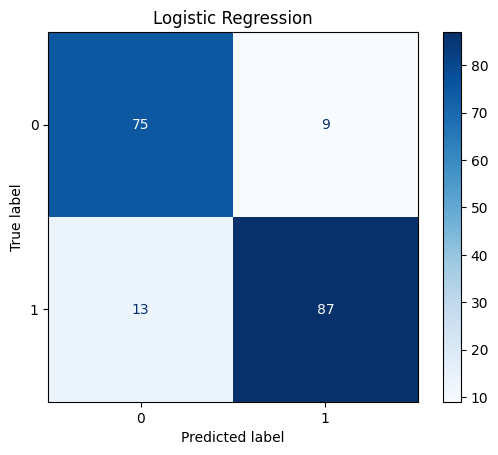

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        84
           1       0.91      0.87      0.89       100

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184









LogisticRegression(C=0.30000000000000004, penalty='l1', solver='saga')

In [22]:
prediction_evaluate(lg_grid,"Logistic Regression")
lg_grid.best_estimator_

**CREATE SUPPORT VECTOR CLASSIFIER**

In [23]:
# Support Vector Classifier
param = {
    "C": np.arange(0.0, 1.1, 0.1),
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [1, 2, 3, 4, 5],
    "gamma": ["scale", "auto", 0.1, 1.0]
}

svc_model = SVC()
svc_grid = GridSearchCV(estimator=svc_model, param_grid=param, cv=5, scoring="accuracy")

**TRAIN SUPPORT VECTOR CLASSIFIER**

In [24]:
svc_grid.fit(scaled_X_train,y_train)

C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
400 fits failed out of a total of 4400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'degree': [1, 2, 3, 4, 5],
                         'gamma': ['scale', 'auto', 0.1, 1.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

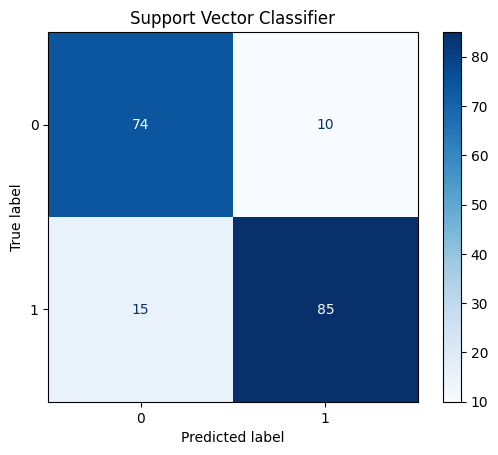

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        84
           1       0.89      0.85      0.87       100

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184









SVC(C=0.4, degree=1, gamma=0.1, kernel='sigmoid')

In [25]:
prediction_evaluate(svc_grid,"Support Vector Classifier")
svc_grid.best_estimator_

**CREATE RANDOM FOREST**

In [26]:
# Random Forest Classifier
param = {
    "criterion" : ["gini", "entropy", "log_loss"],
    "max_depth": [None, 10, 50, 100],
    "n_estimators": [10,25,50,75,100]
}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(estimator=rfc,param_grid=param,cv=5,scoring="accuracy")

**TRAIN RANDOM FOREST**

In [27]:
rfc_grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 50, 100],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='accuracy')

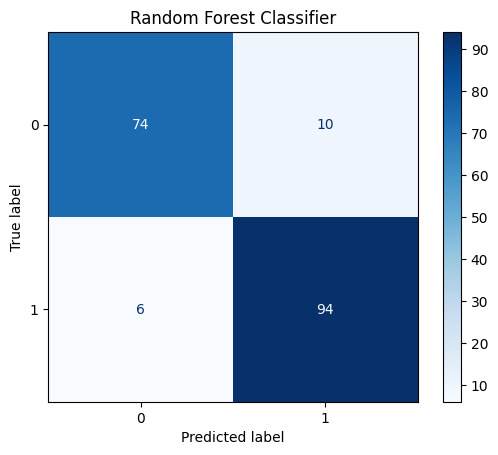

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        84
           1       0.90      0.94      0.92       100

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184









RandomForestClassifier(criterion='log_loss', max_depth=100, n_estimators=25)

In [28]:
prediction_evaluate(rfc_grid,"Random Forest Classifier")
rfc_grid.best_estimator_

**CREATE GRADIENT BOOSTER**

In [29]:
# Gradient Boosting Classifier
param = {
    "loss" : ['log_loss', 'exponential'],
    "learning_rate":np.arange(0.0,1.1,0.1),
    "n_estimators":[10,12,8,7],
    "criterion" : ['friedman_mse', 'squared_error']
}
gbc = GradientBoostingClassifier()
gbc_grid = GridSearchCV(estimator=gbc,param_grid=param,cv=5,scoring="accuracy")

**TRAIN GRADIENT BOOSTER**

In [30]:
gbc_grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [10, 12, 8, 7]},
             scoring='accuracy')

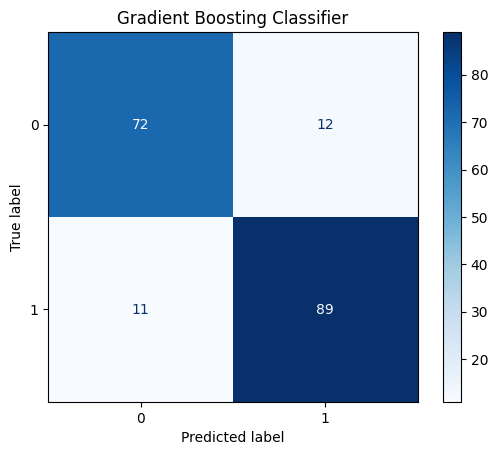

              precision    recall  f1-score   support

           0       0.87      0.86      0.86        84
           1       0.88      0.89      0.89       100

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184









GradientBoostingClassifier(learning_rate=0.5, loss='exponential',
                           n_estimators=7)

In [31]:
prediction_evaluate(gbc_grid,"Gradient Boosting Classifier")
gbc_grid.best_estimator_

**AUTO-CHECK ALL MODELS**

In [33]:
result, model = AutoLogger.train_and_log_classification(scaled_X_train,y_train,scaled_X_test,y_test,size='large')

C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\sanzz\anaconda3\envs\san\Lib\site-packages\AutoLogging_ML\AutoLogger.py:485: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  name=dat.loc[b][0]


In [34]:
result

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
1,decision tree,100.000000,100.000000,100.000000,100.000000,"[[326, 0], [0, 408]]",78.804348,78.652684,78.785714,78.698014,"[[66, 18], [21, 79]]",precision recall f1-score ...,precision recall f1-score ...
3,adaboost,87.874659,87.767871,87.644352,87.701883,"[[279, 47], [42, 366]]",86.413043,86.292335,86.357143,86.322143,"[[72, 12], [13, 87]]",precision recall f1-score ...,precision recall f1-score ...
9,linear discriminant analysis,85.013624,84.870169,84.731745,84.795071,"[[268, 58], [52, 356]]",86.956522,86.879433,87.142857,86.917881,"[[75, 9], [15, 85]]",precision recall f1-score ...,precision recall f1-score ...
7,bagging classifier,98.228883,98.166911,98.252737,98.208126,"[[321, 5], [8, 400]]",87.500000,87.374096,87.547619,87.437290,"[[74, 10], [13, 87]]",precision recall f1-score ...,precision recall f1-score ...
10,quadratic discriminant analysis,83.787466,83.577531,83.597979,83.587595,"[[267, 59], [60, 348]]",87.500000,87.385621,87.452381,87.416372,"[[73, 11], [12, 88]]",precision recall f1-score ...,precision recall f1-score ...
0,naive bayes,84.059946,83.837608,83.935553,83.882574,"[[270, 56], [61, 347]]",88.043478,87.926136,88.142857,87.992406,"[[75, 9], [13, 87]]",precision recall f1-score ...,precision recall f1-score ...
6,logistic regression,85.286104,85.189419,84.946018,85.051255,"[[267, 59], [49, 359]]",88.043478,87.926136,88.142857,87.992406,"[[75, 9], [13, 87]]",precision recall f1-score ...,precision recall f1-score ...
4,gradient boost,93.732970,93.840613,93.468814,93.628472,"[[297, 29], [17, 391]]",90.217391,90.104414,90.238095,90.160428,"[[76, 8], [10, 90]]",precision recall f1-score ...,precision recall f1-score ...
5,xgboost,100.000000,100.000000,100.000000,100.000000,"[[326, 0], [0, 408]]",90.217391,90.493469,89.857143,90.075512,"[[72, 12], [6, 94]]",precision recall f1-score ...,precision recall f1-score ...
8,extra trees classifier,100.000000,100.000000,100.000000,100.000000,"[[326, 0], [0, 408]]",90.217391,90.219990,90.047619,90.122868,"[[74, 10], [8, 92]]",precision recall f1-score ...,precision recall f1-score ...


decision tree
adaboost
linear discriminant analysis
bagging classifier
quadratic discriminant analysis
naive bayes
logistic regression
gradient boost
xgboost
extra trees classifier
random forest


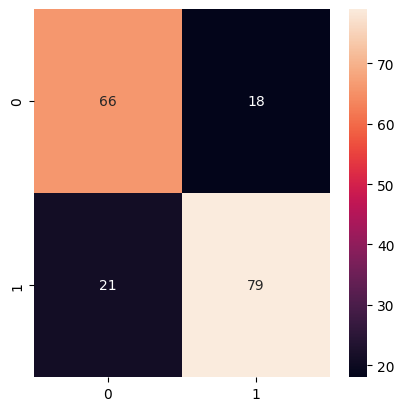

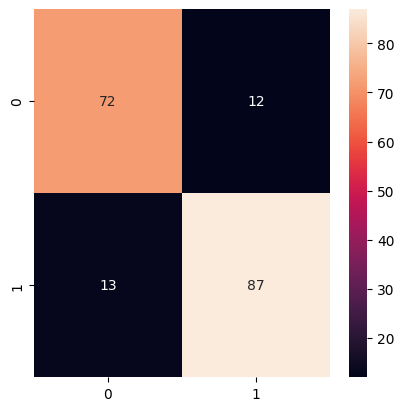

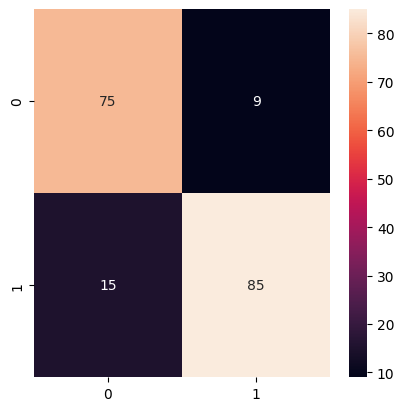

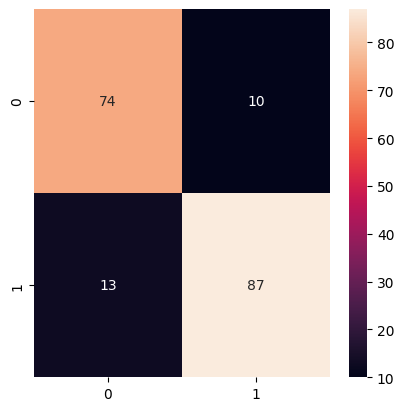

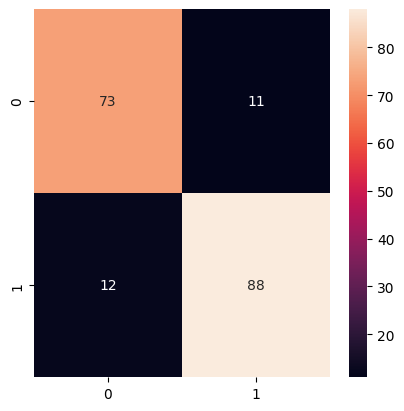

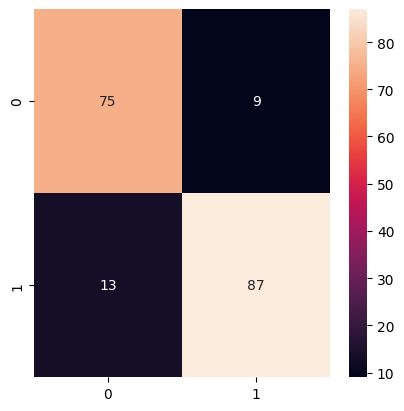

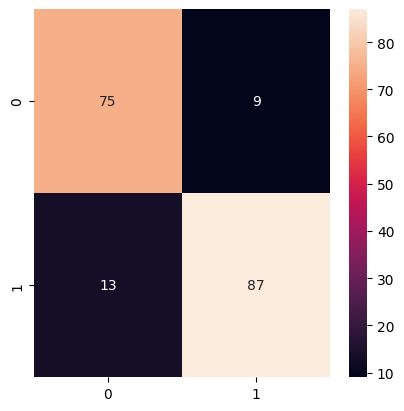

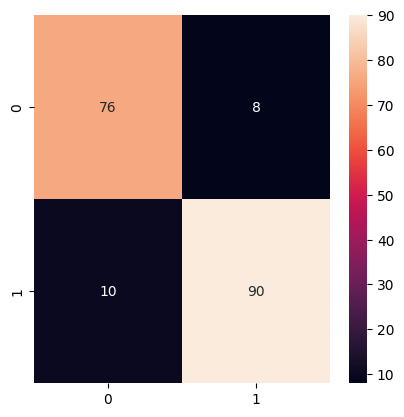

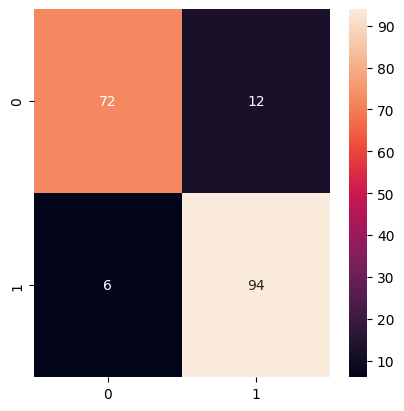

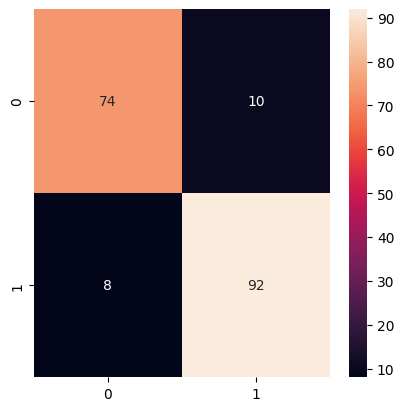

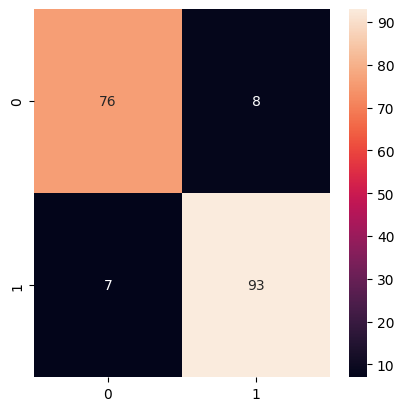

In [35]:
AutoLogger.get_confusion_matrix(result,'validation')

In [36]:
AutoLogger.get_classification_report(result,'validation')

decision tree
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        84
           1       0.81      0.79      0.80       100

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184

adaboost
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        84
           1       0.88      0.87      0.87       100

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

linear discriminant analysis
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        84
           1       0.90      0.85      0.88       100

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.8

**THANK YOU!!!**